In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Reading Data

In [2]:
df=pd.read_csv('D:/sql/Data set/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.duplicated().sum()

2

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,299,299,299,299
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,193,260


## EDA

In [8]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Car_Name,98
Year,16
Selling_Price,156
Present_Price,148
Driven_kms,206
Fuel_Type,3
Selling_type,2
Transmission,2
Owner,3


In [9]:
print(df['Fuel_Type'].value_counts())
print('*'*33)
print(df['Selling_type'].value_counts())
print('*'*33)
print(df['Transmission'].value_counts())
print('*'*33)
print(df['Owner'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
*********************************
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
*********************************
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
*********************************
Owner
0    288
1     10
3      1
Name: count, dtype: int64


In [10]:
df[df['Fuel_Type'] == 'CNG']

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


In [11]:
df[df['Owner'] >= 1]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
58,etios g,2014,4.10,6.80,39485,Petrol,Dealer,Manual,1
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
192,Hero Hunk,2007,0.20,0.75,49000,Petrol,Individual,Manual,1
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
205,grand i10,2016,5.25,5.70,3493,Petrol,Dealer,Manual,1


In [12]:
df['Car_Name'].value_counts().head(25)

Car_Name
city                         26
corolla altis                16
verna                        14
brio                         10
fortuner                     10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
sx4                           6
eon                           6
alto k10                      5
i10                           5
ertiga                        5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
Name: count, dtype: int64

### Let's see The Unrepeated Car_Name To Know How they affect data 

In [13]:
unique_counts = df['Car_Name'].value_counts()
unique_counts_one = unique_counts[unique_counts == 1]
print(len(unique_counts_one))
print(len(unique_counts[unique_counts == 2]))
print(len(unique_counts[unique_counts == 3]))

47
17
10


In [14]:
filtered_df = df[df['Car_Name'].isin(unique_counts_one.index)]
filtered_df.sort_values(by='Present_Price', ascending=False)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.00,92.600,78000,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.730,142000,Petrol,Individual,Automatic,3
77,corolla,2004,1.50,12.350,135154,Petrol,Dealer,Automatic,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
40,baleno,2016,5.85,7.870,24524,Petrol,Dealer,Automatic,0
81,etios gd,2015,4.75,7.850,40000,Diesel,Dealer,Manual,0
21,ignis,2017,4.90,5.710,2400,Petrol,Dealer,Manual,0
10,alto 800,2017,2.85,3.600,2135,Petrol,Dealer,Manual,0
106,Hyosung GT250R,2014,1.35,3.450,16500,Petrol,Individual,Manual,1


### Let's see The most expensive Cars To Find a relation among them

In [174]:
df[df['Present_Price']>10].head(33).sort_values(by='Present_Price', ascending=False)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0


In [15]:
df[df['Car_Name'] == 'corolla']

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
77,corolla,2004,1.5,12.35,135154,Petrol,Dealer,Automatic,0


In [16]:
df[df['Car_Name'] == 'camry']

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


### It seems corolla & camry Cars behave strang (data exception)

## Features Engineering

In [17]:
def plot_distribution(df, x_column):
   
    sns.displot(data=df, x=x_column, kde=True)
    plt.title(f"Distribution of {x_column.name}")
    plt.show()

D:\Anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


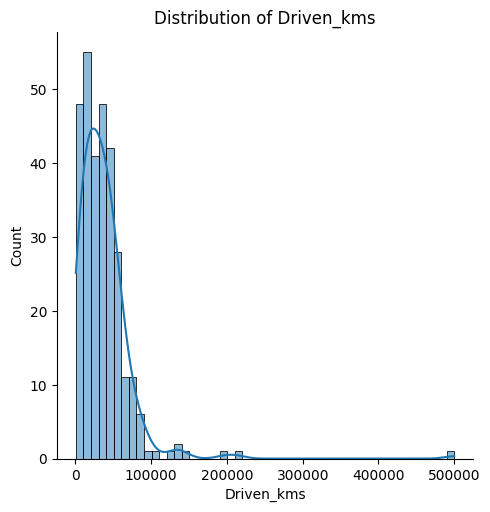

In [18]:
plot_distribution(df, df['Driven_kms'])

D:\Anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


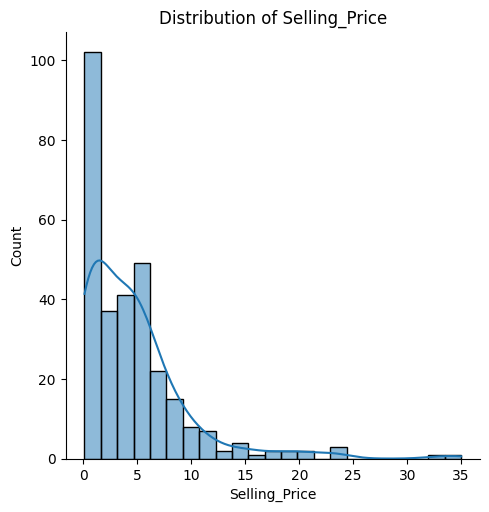

In [19]:
plot_distribution(df, df['Selling_Price'])

D:\Anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


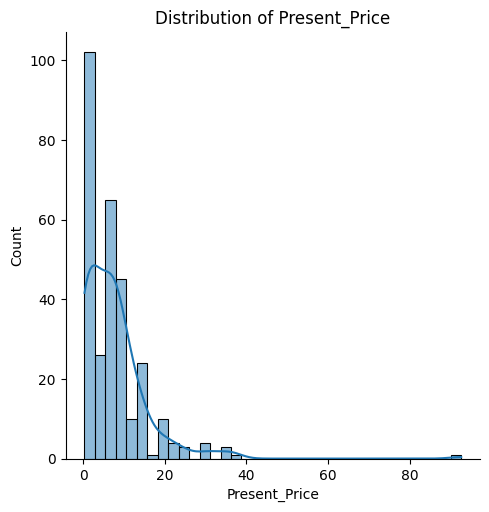

In [20]:
plot_distribution(df, df['Present_Price'])

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

scaler = MinMaxScaler()
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [27]:
df_scl=df.drop('Car_Name',axis=1)

categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
for col in categorical_cols:
    df_scl[col] = label_encoder.fit_transform(df_scl[col])
    
numerical_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
df_scl[numerical_cols] = scaler.fit_transform(df_scl[numerical_cols])



In [29]:
df_scl[df_scl['Owner']>0]

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
58,0.733333,0.114613,0.070221,0.078048,2,0,1,1
85,0.200000,0.068768,0.253684,0.283283,2,1,0,3
106,0.733333,0.035817,0.033919,0.032032,2,1,1,1
184,0.333333,0.004298,0.004660,0.051051,2,1,1,1
191,0.600000,0.002865,0.002709,0.049049,2,1,1,1
192,0.266667,0.002865,0.004660,0.097097,2,1,1,1
193,0.666667,0.002865,0.003576,0.047047,2,1,1,1
198,0.533333,0.001433,0.002709,0.069069,2,1,1,1
201,0.466667,0.090258,0.070113,0.115115,1,0,1,1
205,0.866667,0.147564,0.058301,0.005992,2,0,1,1


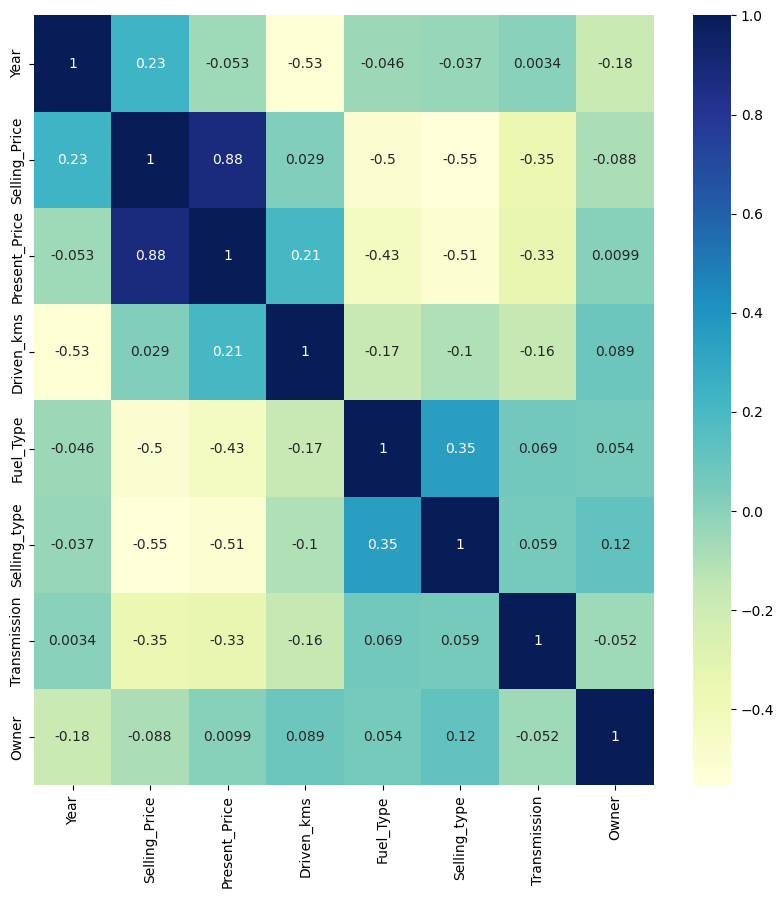

In [30]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df_scl.corr(), cmap="YlGnBu", annot=True)

In [31]:
df_scl.drop([85,77],inplace=True)

Droping data exception

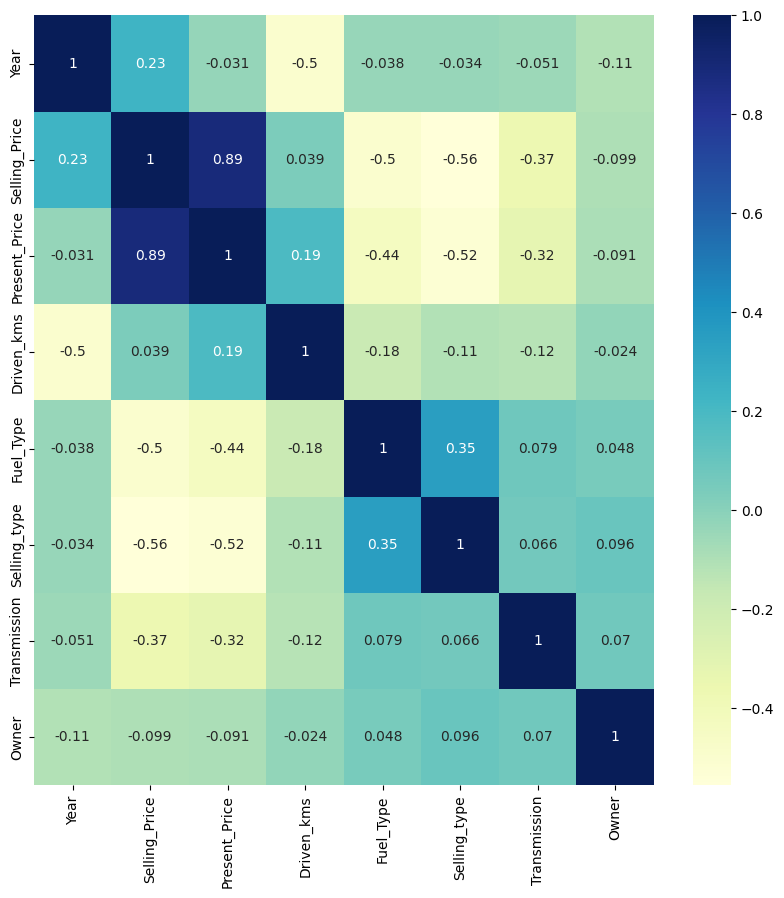

In [32]:
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df_scl.corr(), cmap="YlGnBu", annot=True)

### Owner feature have no real relation after removing data exception


D:\Anaconda_3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


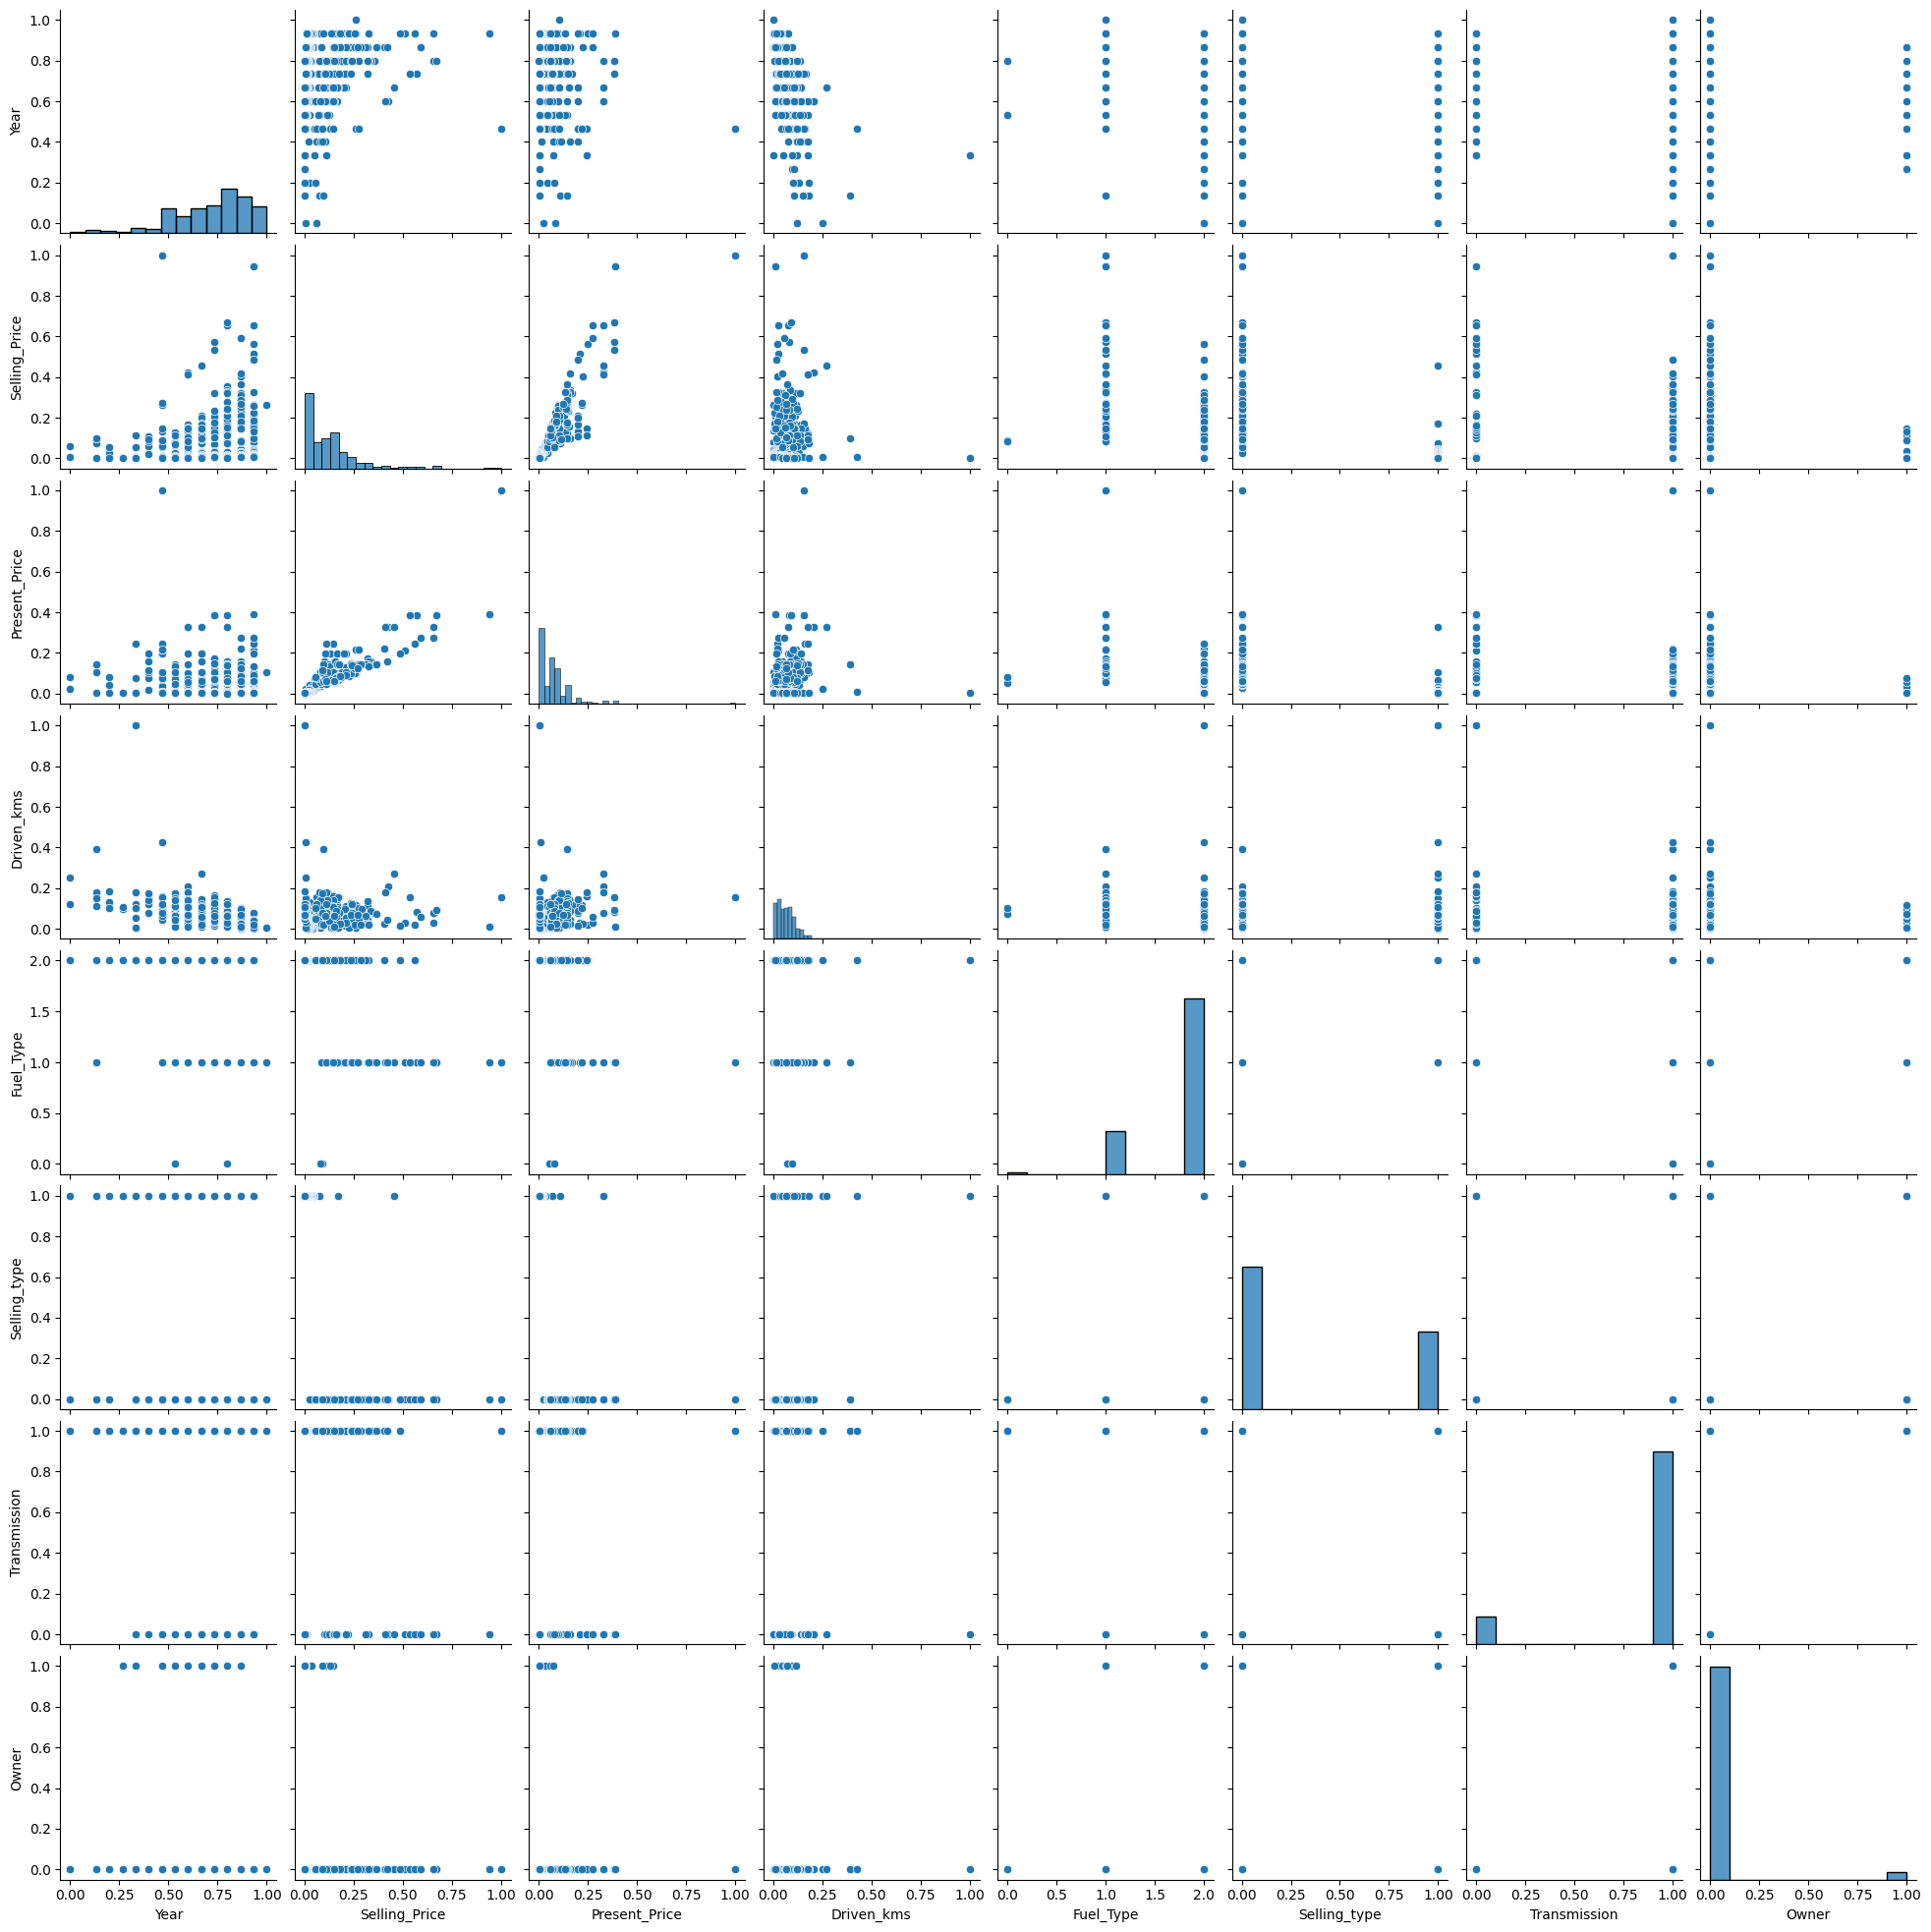

In [33]:
sns.pairplot(data=df_scl)

## Building & Evaluation Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [36]:
X = df_scl.drop(['Selling_Price'],axis=1)
y = df_scl['Selling_Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 7)
(90, 7)
(207,)
(90,)


In [37]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_train_pred = model_lr.predict(X_train)
y_pred = model_lr.predict(X_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_pred))

0.002722643707624996
0.0019687780631366513
0.8877564037772698
0.816676113115688


In [38]:
model_tree = DecisionTreeRegressor(max_depth=5)
model_tree.fit(X_train,y_train)
y_train_pred = model_tree.predict(X_train)
y_pred = model_tree.predict(X_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_pred))

0.0005033537663001753
0.001209420998747191
0.9792487585711053
0.8873840771993341


In [39]:
model_forest = RandomForestRegressor()
model_forest.fit(X_train,y_train)
y_train_pred = model_forest.predict(X_train)
y_pred = model_forest.predict(X_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_pred))

0.00030881073725745774
0.0005633507025576337
0.9872689813930131
0.9475432795572016


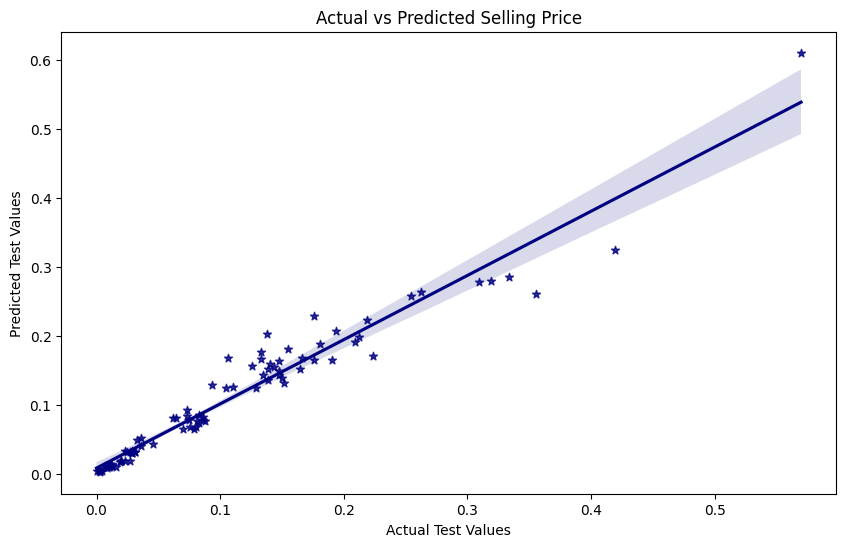

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, color="navy",marker="*",label="best_fit_line")
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')
plt.show()

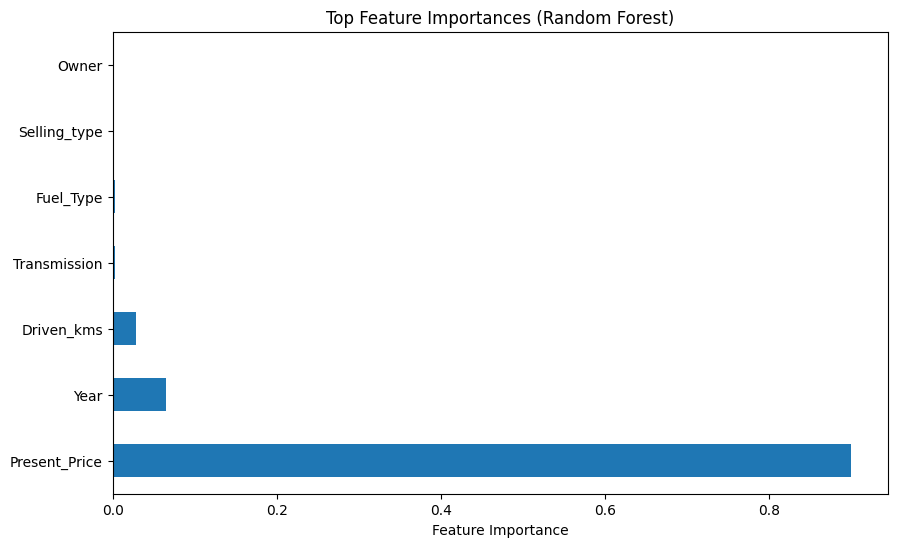

In [41]:
feature_importances = pd.Series(model_forest.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances (Random Forest)')
plt.show()

### Trying Cross Validation Or KFold Spliting

In [42]:
kf = KFold(n_splits=22)
list_of_mse = []
list_of_r2_score = []

for train_idx, test_idx in kf.split(X, y):
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error & r2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    list_of_mse.append(mse)
    list_of_r2_score.append(r2)

In [43]:
list_of_r2_score

[0.8104645878341272,
 0.9272660849903277,
 0.9537951312434636,
 0.9759299434954504,
 0.8592347767744606,
 0.7045902283812226,
 0.87442065833148,
 -3.841148154448038,
 -2.2381933266932217,
 -7.488907769929355,
 -4.449627251578611,
 -15.418746874999957,
 -2.2362496863237036,
 -8.104161119081754,
 0.9379368576809994,
 0.9435227197002468,
 0.8861126865459849,
 0.8339595838677798,
 0.9143235769068243,
 0.8755178509148867,
 0.898422429925802,
 0.8941782470699993]

In [44]:
list_of_mse

[0.0006216568841212895,
 0.0001921433356751701,
 0.00013694046964193274,
 0.0008883077871751011,
 0.009302541355513111,
 0.01920665995587652,
 0.003100464829634291,
 8.345319121236406e-05,
 3.813182509643947e-05,
 2.4667014228126187e-05,
 6.868818811011416e-06,
 6.636296405296645e-06,
 5.012135178882562e-06,
 6.165455253935626e-06,
 0.00030792571742179614,
 0.0003741827116488267,
 0.0006706125161281337,
 0.0006081169625359911,
 0.0005121929787111768,
 0.00032438617467458065,
 0.00047889442362795037,
 0.0006401356885411421]